In [30]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

df=pd.read_csv('../LeaksCleanedwithDollar (1).csv')

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
df = df.set_index('Date').reindex(full_date_range)
df.index.name = 'Date'
df['Dambulla'] = df['Dambulla'].interpolate(method='linear')
df = df.reset_index()
df = df[['Date', 'Dambulla']]
df

,Date,Dambulla
0,2020-01-01,305.0
1,2020-01-02,265.0
2,2020-01-03,225.0
3,2020-01-04,185.0
4,2020-01-05,145.0
...,...,...
1454,2023-12-25,282.0
1455,2023-12-26,296.0
1456,2023-12-27,310.0
1457,2023-12-28,290.0


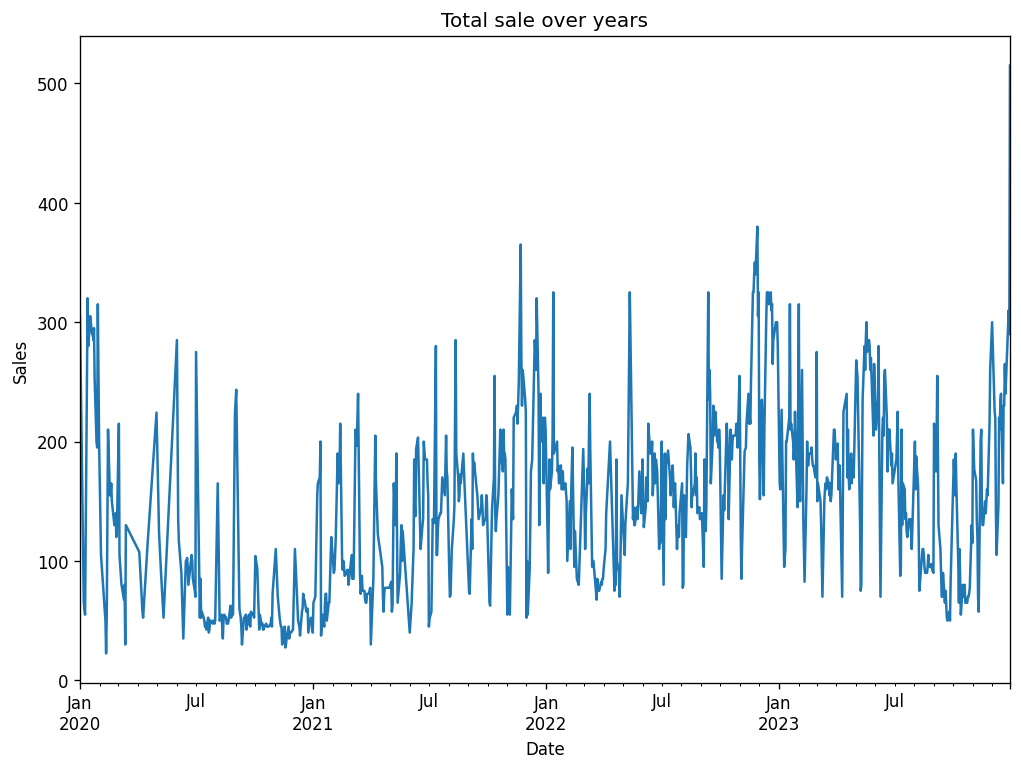

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df= df.set_index('Date')
df['Dambulla'].plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

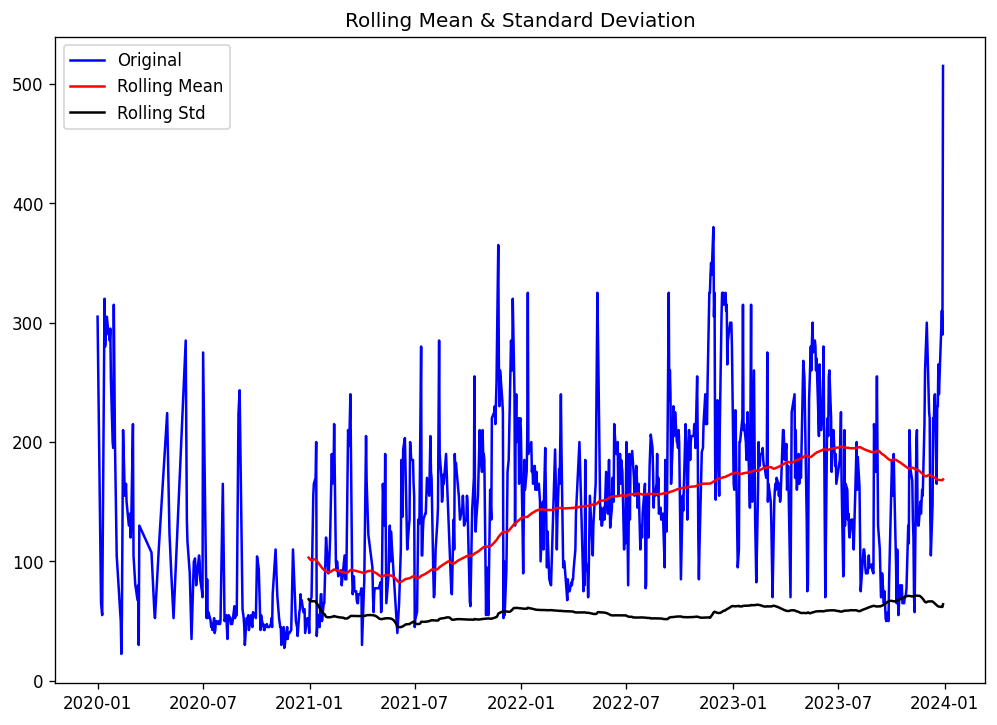

In [33]:

moving_avg = df.rolling(365).mean()
moving_std= df.rolling(365).std()
#Plot rolling statistics:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [34]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.430550
p-value                           0.133299
#Lags Used                       24.000000
Number of Observations Used    1434.000000
Critical Value (1%)              -3.434918
Critical Value (5%)              -2.863558
Critical Value (10%)             -2.567844
dtype: float64


In [35]:
train_size = int(0.95 * len(df))

train = df[:train_size]
test = df[train_size:]

In [36]:
import pmdarima

from pmdarima import auto_arima
auto_arima(df,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13926.380, Time=2.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16534.213, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13934.028, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15271.272, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18971.295, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13924.470, Time=0.72 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=14669.253, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13923.739, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13924.874, Time=0.71 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13923.124, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13924.755, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13926.730, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=13974.746, Time=0.26 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 8.001 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [37]:
import pmdarima

from pmdarima import auto_arima
auto_arima(df,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13926.380, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16534.213, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13934.028, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15271.272, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18971.295, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13924.470, Time=0.69 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=14669.253, Time=0.94 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13923.739, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13924.874, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13923.124, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13924.755, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13926.730, Time=0.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=13974.746, Time=0.22 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 7.726 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [38]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(2,0,0)).fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [39]:
pred= model.predict(start=len(train), end=(len(df)-1),dynamic=True)
pred

2023-10-18     75.881607
2023-10-19     82.759877
2023-10-20     89.093109
2023-10-21     94.782133
2023-10-22     99.877430
                 ...    
2023-12-25    143.400649
2023-12-26    143.404488
2023-12-27    143.407926
2023-12-28    143.411003
2023-12-29    143.413758
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

In [40]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)
from sklearn.metrics import root_mean_squared_error

# Calculate RMSE directly using root_mean_squared_error
rmse = root_mean_squared_error(test, pred)

# Print the RMSE
print('RMSE: %f' % rmse)
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(test, pred)

# Print the MAE
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(test, pred))

# Print the RMSLE
print('RMSLE: %f' % rmsle)

MAPE: 0.321796
RMSE: 84.941247
MAE: 60.958067
RMSLE: 0.438793


In [41]:
test


,Dambulla
Date,
2023-10-18,75.0
2023-10-19,80.0
2023-10-20,65.0
2023-10-21,65.0
2023-10-22,65.0
...,...
2023-12-25,282.0
2023-12-26,296.0
2023-12-27,310.0


In [42]:
pred

2023-10-18     75.881607
2023-10-19     82.759877
2023-10-20     89.093109
2023-10-21     94.782133
2023-10-22     99.877430
                 ...    
2023-12-25    143.400649
2023-12-26    143.404488
2023-12-27    143.407926
2023-12-28    143.411003
2023-12-29    143.413758
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

<Axes: xlabel='Date'>

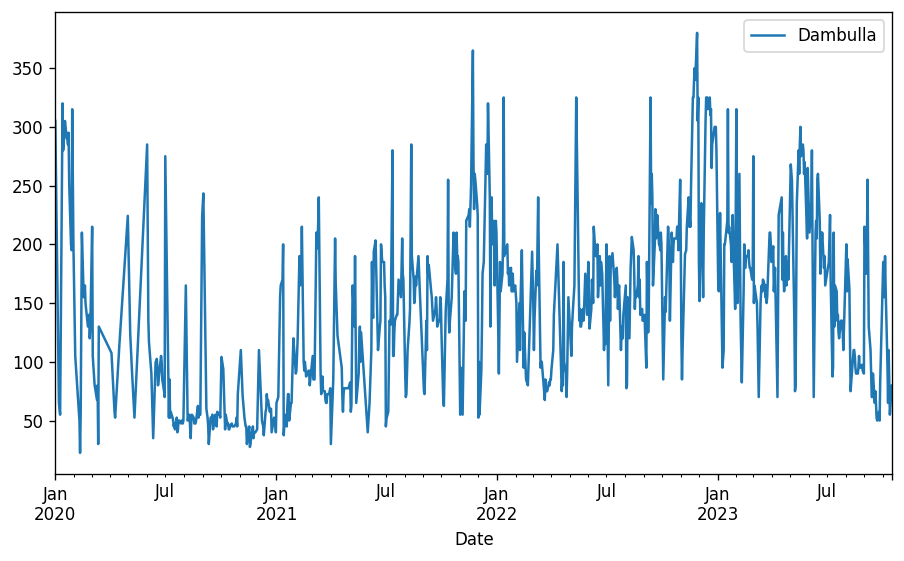

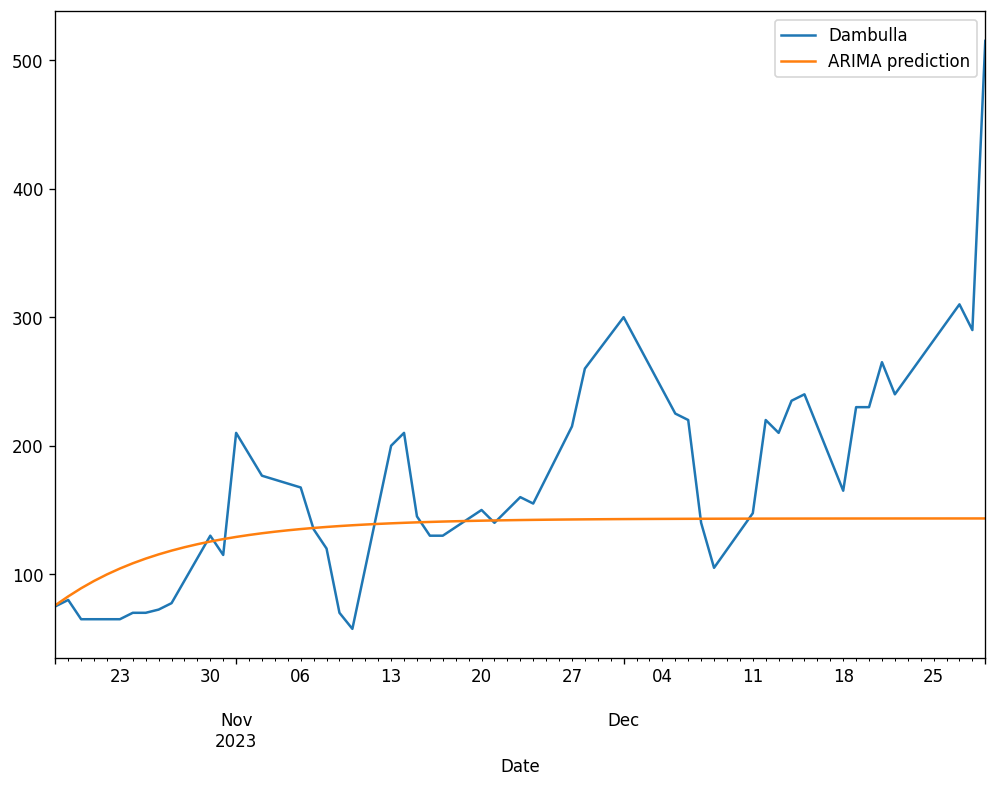

In [43]:
train.plot(legend=True, label='Train', figsize=(9,5))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')